# Data exploration pre-processing & Splitting on Crop yield Dataset

In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [118]:
df = pd.read_csv("production.csv")


# check for null values


In [119]:
df.isnull().sum()

Rainfall       1
Temperature    1
Ph             1
Production     0
dtype: int64

# Handling the missing value in Rainfall



In [120]:
#fill the 'rice_yield_gap' with mean value since it is numerical value
df['Rainfall'].mean()

1027.102072481943

In [121]:
df['Rainfall'].fillna(df['Rainfall'].mean(),inplace=True)

In [122]:
df['Rainfall'].isnull().sum()

0

# Exploratory Data Analysis Visusalizing the data

<AxesSubplot:title={'center':'Production'}, xlabel='Production', ylabel='Density'>

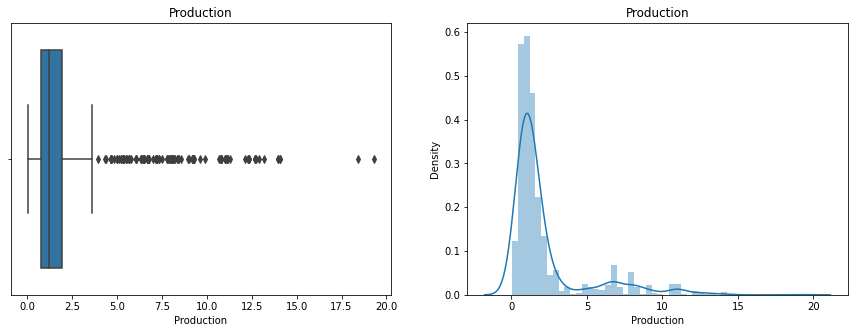

In [123]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Production')
sns.boxplot(df['Production'])
plt.subplot(1,2,2)
plt.title('Production')
sns.distplot(df['Production'])

<AxesSubplot:title={'center':'Ph'}, xlabel='Ph', ylabel='Density'>

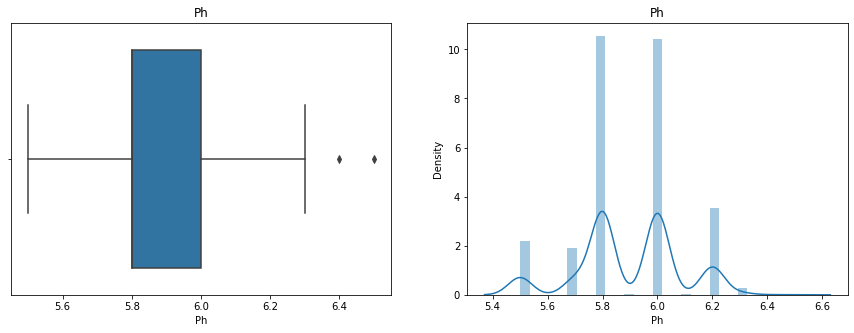

In [124]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Ph')
sns.boxplot(df['Ph'])
plt.subplot(1,2,2)
plt.title('Ph')
sns.distplot(df['Ph'])

<AxesSubplot:title={'center':'Rainfall'}, xlabel='Rainfall', ylabel='Density'>

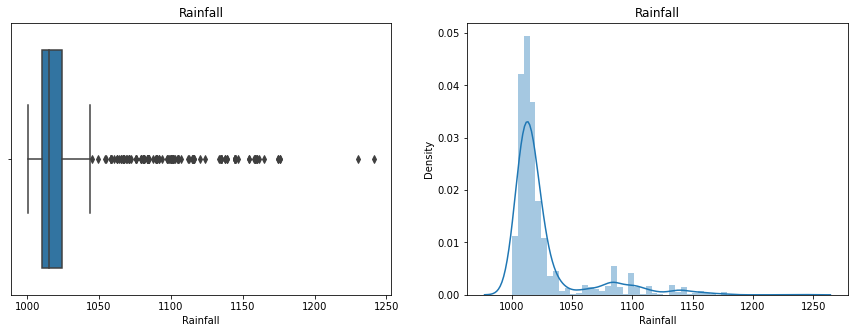

In [125]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Rainfall')
sns.boxplot(df['Rainfall'])
plt.subplot(1,2,2)
plt.title('Rainfall')
sns.distplot(df['Rainfall'])

# Handling the outliers in Rainfall

In [126]:
#handling the outliers in 'rm' column
#IQR method
q1=df['Rainfall'].quantile(0.25)
q3=df['Rainfall'].quantile(0.75)
iqr=q3-q1

In [127]:
q1,q3,iqr

(1010.0, 1024.1287525, 14.128752500000019)

In [128]:
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
upper_limit,lower_limit

(1045.32188125, 988.80687125)

In [129]:
#number of outliers in 'Production' column
df.loc[(df['Rainfall']>upper_limit)|(df['Rainfall']<lower_limit)]

,Rainfall,Temperature,Ph,Production
390,1144.79461,35.0,5.8,11.13805
391,1144.79592,35.0,5.8,11.13815
392,1144.79944,33.0,5.8,11.13842
393,1144.80014,33.0,5.8,11.13847
394,1144.80018,33.0,5.8,11.13848
...,...,...,...,...
1518,1137.50000,39.0,5.8,11.00000
1519,1138.75000,39.0,5.8,11.10000
1520,1138.97059,39.0,5.8,11.11765
1521,1144.65881,35.0,5.8,11.12760


In [130]:
#capping - change the outlier values to upper or lower limit values
df.loc[(df['Rainfall']>upper_limit),'Rainfall']=upper_limit
df.loc[(df['Rainfall']<lower_limit),'Rainfall']=lower_limit

<AxesSubplot:title={'center':'Rainfall'}, xlabel='Rainfall', ylabel='Density'>

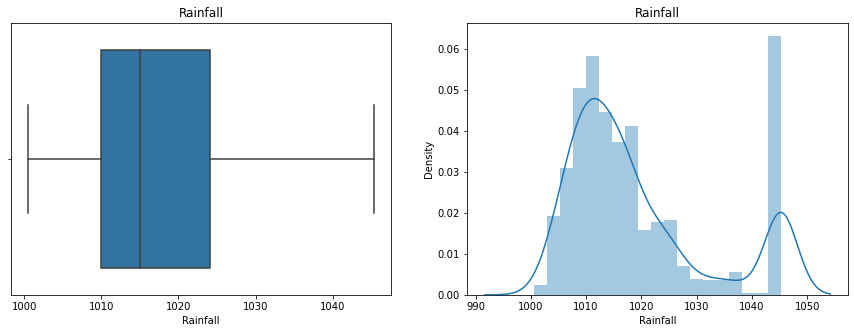

In [131]:
#after removing the outliers in rice_yield_gap column
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Rainfall')
sns.boxplot(df['Rainfall'])
plt.subplot(1,2,2)
plt.title('Rainfall')
sns.distplot(df['Rainfall'])

# Splitting independent and dependent variables

In [132]:
x = df.drop(columns=['Production'], axis=1)
y = df['Production']

In [133]:
x

,Rainfall,Temperature,Ph
0,1000.499200,35.00000,5.5
1,1001.685190,35.00000,5.5
2,1001.953130,34.00000,5.5
3,1002.182540,33.66667,5.5
4,1002.372790,33.16667,5.5
...,...,...,...
1519,1045.321881,39.00000,5.8
1520,1045.321881,39.00000,5.8
1521,1045.321881,35.00000,5.8
1522,1045.321881,35.00000,5.8


In [134]:
y

0        0.03994
1        0.13481
2        0.15625
3        0.17460
4        0.18982
          ...   
1519    11.10000
1520    11.11765
1521    11.12760
1522    11.13793
1523     2.16263
Name: Production, Length: 1524, dtype: float64

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [135]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [136]:
x_train

,Rainfall,Temperature,Ph
196,1007.697120,13.0,5.7
737,1014.254970,17.0,5.8
601,1012.245850,17.0,5.8
106,1006.034480,11.0,5.5
75,1005.065480,11.0,5.5
...,...,...,...
1424,1045.321881,27.0,6.2
1142,1022.906700,21.0,6.0
998,1018.171450,19.0,6.0
206,1007.774390,13.0,5.7


In [137]:
y_train


196     0.61577
737     1.14040
601     0.97967
106     0.48276
75      0.44048
         ...   
1424    6.73566
1142    1.83254
998     1.45372
206     0.62195
867     1.30769
Name: Production, Length: 1219, dtype: float64